<a href="https://colab.research.google.com/github/MrFluorine/Kaggle-Practice-Competitions/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [63]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


Importing Data

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
test = pd.read_csv('/content/drive/MyDrive/Colab/spaceship-titanic/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab/spaceship-titanic/train.csv')

Exploring Data

In [67]:
r1,c1 = train.shape
r2,c2 = test.shape
print( "train data has {} rows and {} columns".format(r1,c1))
print( "test data has {} rows and {} columns".format(r2,c2))

train data has 8693 rows and 14 columns
test data has 4277 rows and 13 columns


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [69]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [70]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


MISSING VAlues

In [71]:
print("MISSING VALUES IN TRAINING SET")
print(train.isna().sum().nlargest(c1))
print("MISSING VALUES IN TEST SET")
print(test.isna().sum().nlargest(c2))
train.info()

MISSING VALUES IN TRAINING SET
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64
MISSING VALUES IN TEST SET
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destin

In [72]:
train.set_index("PassengerId", inplace=True)
test.set_index("PassengerId", inplace=True)

In [73]:
train['CryoSleep'] = train['CryoSleep'].fillna(False)
test['CryoSleep'] = test['CryoSleep'].fillna(False)

train['HomePlanet'] = train['HomePlanet'].fillna('Earth')
test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

train['Cabin'] = train['Cabin'].fillna('T/0/P')
test['Cabin'] = test['Cabin'].fillna('T/0/P')

train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

train['VIP'] = train['VIP'].fillna(False)
test['VIP'] = test['VIP'].fillna(False)

train['RoomService'] = train['RoomService'].fillna(0)
test['RoomService'] = test['RoomService'].fillna(0)

train['FoodCourt'] = train['FoodCourt'].fillna(0)
test['FoodCourt'] = test['FoodCourt'].fillna(0)

train['ShoppingMall'] = train['ShoppingMall'].fillna(0)
test['ShoppingMall'] = test['ShoppingMall'].fillna(0)

train['Spa'] = train['Spa'].fillna(0)
test['Spa'] = test['Spa'].fillna(0)

train['VRDeck'] = train['VRDeck'].fillna(0)
test['VRDeck'] = test['VRDeck'].fillna(0)



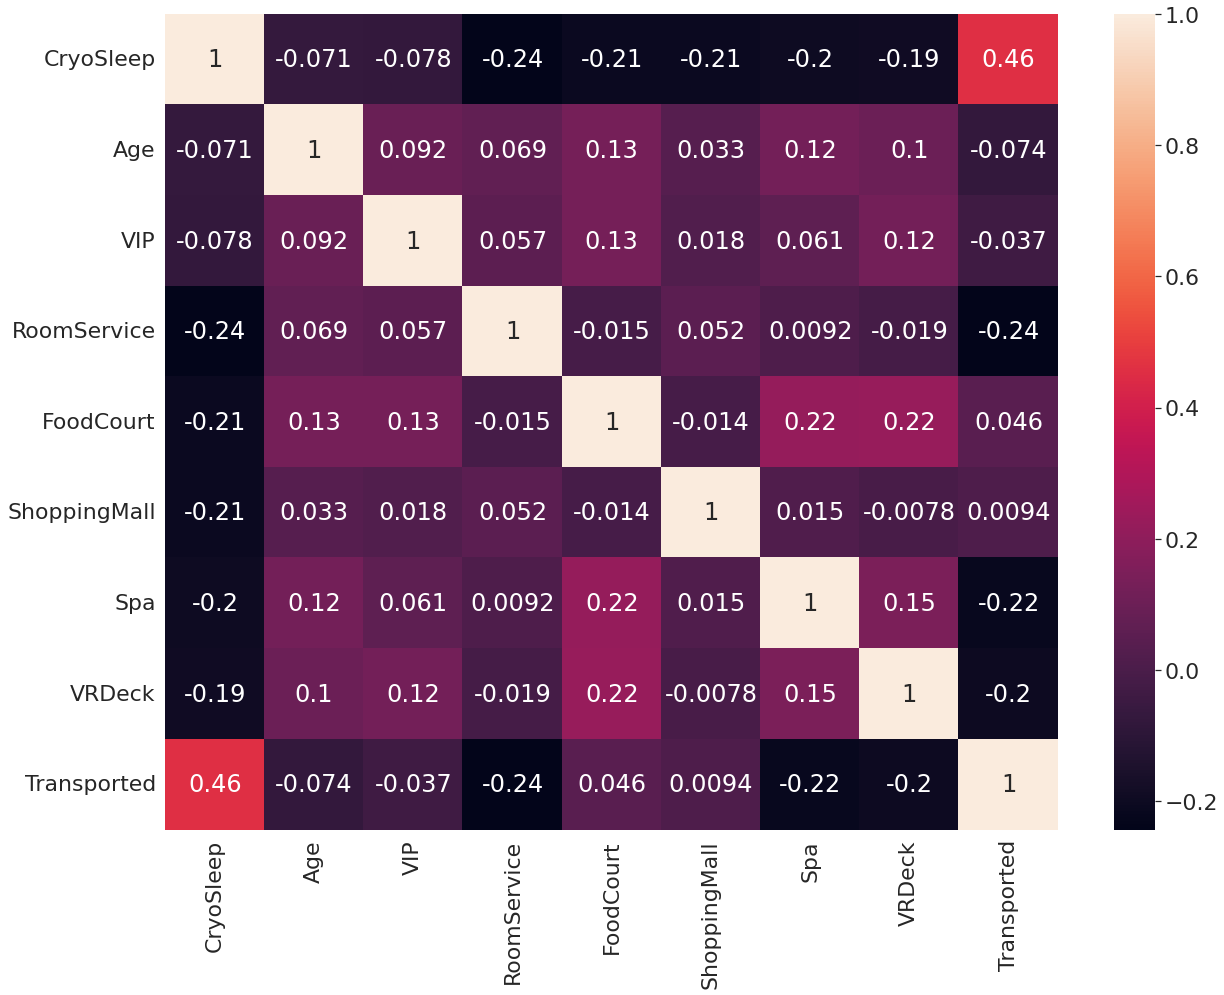

In [74]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True);

In [75]:
train[['Deck','Num','Side']] = train.Cabin.str.split('/',expand=True)
test[['Deck','Num','Side']] = test.Cabin.str.split('/',expand=True)

In [76]:
train['total_spent']= train['RoomService']+ train['FoodCourt']+ train['ShoppingMall']+ train['Spa']+ train['VRDeck']
test['total_spent']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']

In [77]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((train[i], test[i])).astype(str)
    le.fit(arr)
    train[i]=le.transform(train[i].astype(str))
    test[i]=le.transform(test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num


In [78]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,total_spent
PassengerId,,,,,,,,,,,,,,,,,
0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,0.0
0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,736.0
0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,10383.0
0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,5176.0
0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,1091.0


Droping columns

In [79]:
train = train.drop(['Name', 'Cabin'], axis = 1)
test = test.drop(['Name', 'Cabin'], axis =1)

In [80]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,total_spent
PassengerId,,,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0.0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1,736.0
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,10383.0
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,5176.0
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1,1091.0


Spliting Data

In [81]:
train['Transported']=train['Transported'].replace({True:1,False:0})
X=train.drop('Transported',axis=1)
y = train['Transported']

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [83]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=300,
                         eval_metric='Accuracy',
                        verbose=0)

In [84]:
model.fit(X_train,y_train)

In [85]:
pred_y=model.predict(X_val)

pred=model.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8731400521552385
0.8072677092916284


In [86]:
y_pred = model.predict(test)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=test.index)

sub.to_csv('subbb.csv')